# EDA on Employees

# Step 1: Understand the Problem and the Data

The first step in any information evaluation project is to sincerely apprehend the trouble you are trying to resolve and
the statistics you have at your disposal. 

This entails asking questions consisting of:

* What is the commercial enterprise goal or research question you are trying to address?
* What are the variables inside the information, and what do they mean?
* What are the data sorts (numerical, categorical, textual content, etc.) ?
* Is there any known information on first-class troubles or obstacles?
* Are there any relevant area-unique issues or constraints?

By thoroughly knowing the problem and the information, you can better formulate your evaluation technique and 
avoid making incorrect assumptions or drawing misguided conclusions. 
    
It is also vital to contain situations and remember specialists or stakeholders to this degree to ensure you have 
complete know-how of the context and requirements.

# Step 2: Import and Inspect the Data

Once you have clean expertise of the problem and the information, the following step is to
import the data into your evaluation environment (e.g., Python). During this step, looking into the statistics
is critical to gain initial know-how of its structure, variable kinds, and capability issues.

Here are a few obligations you could carry out at this stage:

* Load the facts into your analysis environment, ensuring that the facts are imported efficiently and without errors or truncations.
* Examine the size of the facts (variety of rows and columns) to experience its length and complexity.
* Identify facts sorts and formats for each variable, as these records may be necessary for the following facts manipulation and evaluation steps.
* Look for any apparent errors or inconsistencies in the information, such as invalid values, mismatched units, or outliers, 
  that can indicate exceptional issues with information.

In [1]:
import numpy as np
import pandas as pd

Read the dataset using the Pandas read_csv() function 

In [2]:
df=pd.read_csv("Employees.csv")

Print the first five rows we will use the head() function

In [3]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,08-06-93,12:42:00 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53:00 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17:00 AM,130590,11.858,False,Finance
3,Jerry,Male,03-04-05,1:00:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47:00 PM,101004,1.389,True,Client Services


Getting Insights About The Dataset

Let's see the shape of the data using the shape.


In [4]:
df.shape

(1000, 8)

Dataset has 1000 rows and 8 columns.

Now, let's also see the columns and their data types. For this, we will use the info() method.

In [5]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


* We can see the number of unique elements in our dataset. 
* This will help us in deciding which type of encoding to choose for converting categorical columns into numerical columns.

In [6]:
df.nunique()

First Name           200
Gender                 2
Start Date           972
Last Login Time      720
Salary               995
Bonus %              971
Senior Management      2
Team                  10
dtype: int64

* Let's get a quick summary of the dataset using the pandas describe() method. 
* The describe() function applies basic statistical computations on the dataset like extreme values, 
count of data points standard deviation, etc. 
* Any missing value or NaN value is automatically skipped. describe() function gives a good picture of the distribution of data.

In [7]:
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


* Note we can also get the description of categorical columns of the dataset if we specify include ='all'  in the describe function.

* Till now we have got an idea about the dataset used. Now Let’s see if our dataset contains any missing values or not.

# Step 3: Handling Missing Values

You all must be wondering why a dataset will contain any missing values. It can occur when no information is provided for one or more items or for a whole unit. For Example, Suppose different users being surveyed may choose not to share their income, and some users may choose not to share their address in this way many datasets went missing. Missing Data is a very big problem in real-life scenarios

Missing Data can also refer to as NA(Not Available) values in pandas. There are several useful functions for detecting, removing, 
and replacing null values in Pandas DataFrame

* isnull()
* notnull()
* dropna()
* fillna()
* replace()
* interpolate()
  
Now let's check if there are any missing values in our dataset or not.

In [8]:
df.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

We can see that every column has a different amount of missing values. Like Gender has 145 missing values and salary has 0. Now for handling these missing values there can be several cases like dropping the rows containing NaN or replacing NaN with either mean, median, mode, or some other value.

Now, let's try to fill in the missing values of gender with the string "No Gender".

In [9]:
df["Gender"]=df["Gender"].fillna("No Gender")
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

* We can see that now there is no null value for the gender column. 
* Now, Let's fill the senior management with the mode value.

In [10]:
mode=df["Senior Management"].mode().values[0]
df["Senior Management"]=df["Senior Management"].replace(np.nan,mode)
df.isnull().sum()

C:\Users\Akhil\AppData\Local\Temp\ipykernel_12168\2668723391.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Senior Management"]=df["Senior Management"].replace(np.nan,mode)


First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

* np.nan is a special constant in the NumPy library used to represent "Not a Number" (NaN). 
* It is often used to indicate missing, undefined, or invalid values in datasets or calculations.

Key Features of np.nan:

* Type: It is a floating-point constant. Even if used in an integer array, it will cast the array to float.
* Behavior in Operations: 
    * Any arithmetic operation with np.nan results in np.nan (e.g., 5 + np.nan = np.nan).
    * Comparisons involving np.nan always return False (except for np.isnan).
* Identification: Use np.isnan() to check for np.nan values.

Applications:

* Used in data analysis to handle missing values.
* Helps avoid errors or misinterpretations when processing incomplete datasets.

* Now for the first name and team, we cannot fill the missing values with arbitrary data,
* so, let's drop all the rows containing these missing values.

In [11]:
df=df.dropna(axis=0,how="any")
print(df.isnull().sum())
df.shape

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64


(899, 8)

We can see that our dataset is now free of all the missing values and after dropping the data the number of rows also reduced from 1000 to 899.

In pandas, the parameter how='any' is commonly used in methods like dropna() to specify the condition 
for dropping rows or columns containing NaN (missing) values. 

Usage:
* how='any': Drop a row or column if any value in it is NaN.
* how='all': Drop a row or column only if all values in it are NaN.

Parameters in dropna:

* axis: 0 for rows (default), 1 for columns.
* how: 'any' (default) or 'all'.
* thresh: Minimum non-NaN values required to retain.

# Step 4: Explore Data Characteristics

By exploring the characteristics of your information very well, you can gain treasured insights into its structure, pick out capability problems or anomalies, and inform your subsequent evaluation and modeling choices. Documenting any findings or observations from this step is critical, as they may be relevant for destiny reference or communication with stakeholders

Let's start by exploring the data according to the dataset. We'll begin with Gender Diversity Analysis by looking at:

* Gender distribution across the company.
* Departments or teams with significant gender imbalances.

Gender Distribution Across the Company

We'll calculate the proportion of each gender across the company. ​

* Start Date is an important column for employees. 
* However, it is not of much use if we can not handle it properly. 
* To handle this type of data pandas provide a special function from which we can change object type to DateTime format datetime().

In [12]:
# Convert Start Date to datetime format

df["Start Date"]=pd.to_datetime(df["Start Date"])
df.dtypes

C:\Users\Akhil\AppData\Local\Temp\ipykernel_12168\1997660925.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Start Date"]=pd.to_datetime(df["Start Date"])


First Name                   object
Gender                       object
Start Date           datetime64[ns]
Last Login Time              object
Salary                        int64
Bonus %                     float64
Senior Management              bool
Team                         object
dtype: object

In [13]:
df["Last Login Time"]=pd.to_datetime(df["Last Login Time"]).dt.time

C:\Users\Akhil\AppData\Local\Temp\ipykernel_12168\2955208795.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Last Login Time"]=pd.to_datetime(df["Last Login Time"]).dt.time


In [14]:
df.dtypes,df.head()

(First Name                   object
 Gender                       object
 Start Date           datetime64[ns]
 Last Login Time              object
 Salary                        int64
 Bonus %                     float64
 Senior Management              bool
 Team                         object
 dtype: object,
   First Name  Gender Start Date Last Login Time  Salary  Bonus %  \
 0    Douglas    Male 1993-08-06        12:42:00   97308    6.945   
 2      Maria  Female 1993-04-23        11:17:00  130590   11.858   
 3      Jerry    Male 2005-03-04        13:00:00  138705    9.340   
 4      Larry    Male 1998-01-24        16:47:00  101004    1.389   
 5     Dennis    Male 1987-04-18        01:35:00  115163   10.125   
 
    Senior Management             Team  
 0               True        Marketing  
 2              False          Finance  
 3               True          Finance  
 4               True  Client Services  
 5              False            Legal  )

The gender distribution across the company is approximately 57.6% female and 42.4% male

Teams with Significant Gender Imbalances

Next, let's examine the gender distribution within each team to identify any significant imbalances.

In [15]:
# Calculate Gender Destribution across the company

gender_destrubution=df["Gender"].value_counts(normalize=True)*100
gender_destrubution

Gender
Female       43.715239
Male         41.268076
No Gender    15.016685
Name: proportion, dtype: float64

The value_counts(normalize=True) function in pandas provides the relative frequencies (proportions) of unique values in a Series. Instead of returning the raw counts, it normalizes the values to show their percentages of the total count.

Key Points:
* normalize=True: Converts the counts into proportions (as decimals, summing to 1).
* Returns: A Series with unique values as the index and their relative frequencies as the values.

Use Case:
* This is useful for analyzing proportions or distributions, especially when dealing with categorical data.

* If you want to display these as percentages, multiply by 100:

# Step 5: Perform Data Transformation

Data transformation is a critical step within the EDA process because it enables you to prepare your statistics for similar evaluation and modeling. Depending on the traits of your information and the necessities of your analysis, you may need to carry out various ameliorations to ensure that your records are in the most appropriate layout.

Here are a few common records transformation strategies:

* Scaling or normalizing numerical variables to a standard variety (e.g., min-max scaling, standardization)
* Encoding categorical variables to be used in machine mastering fashions (e.g., one-warm encoding, label encoding)
* Applying mathematical differences to numerical variables (e.g., logarithmic, square root) to correct for skewness or non-linearity
* Creating derived variables or capabilities primarily based on current variables (e.g., calculating ratios, combining variables)
* Aggregating or grouping records mainly based on unique variables or situations

By accurately transforming your information, you could ensure that your evaluation and modeling strategies are implemented successfully and that your results are reliable and meaningful.

Encoding Categorical Variables

* There are some models like Linear Regression which does not work with categorical dataset in that case we should try to encode categorical dataset into the numerical column.
* We can use different methods for encoding like Label encoding or One-hot encoding. pandas and sklearn provide different functions for encoding in our case we will use the LabelEncoding function from sklearn to encode the Gender column.

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
# fit and trandform the  "Senior Management" column with LabelEncoder

df["Gender"]=le.fit_transform(df["Gender"])

# Step 6: Visualize Data Relationships

* To visualize data relationships, we'll explore univariate, bivariate, and multivariate analyses using the employees dataset. 
* These visualizations will help uncover patterns, trends, and relationships within the data.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

Univariate Analysis

This analysis focuses on a single variable. Here, we'll look at the distributions of 'Salary' and 'Bonus %'.

* Histogram of Salary
* Histogram of Bonus %
    
Histograms and density plots are typically used to visualize the distribution. 
These plots can show the spread, central tendency, and any skewness in the data.

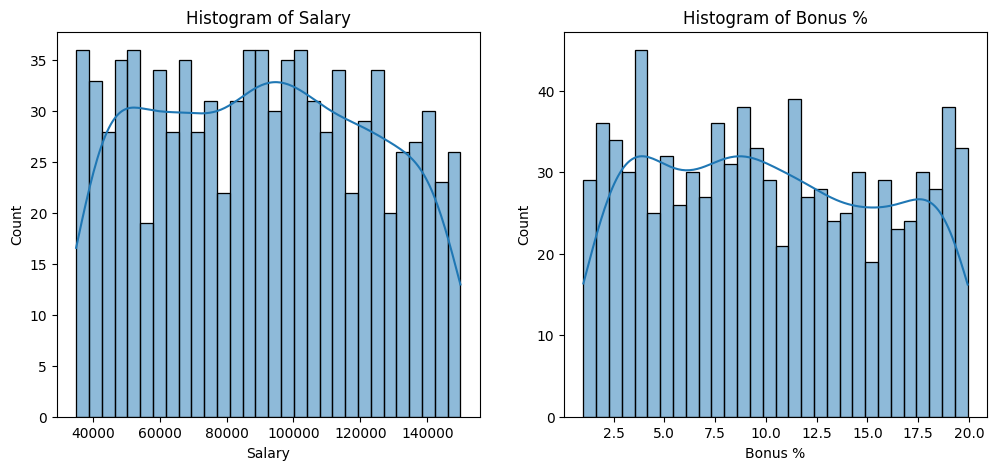

In [20]:
# Univariate Analysis : Histograms for "Salary and Bonus %"

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["Salary"],bins=30,kde=True)
plt.title("Histogram of Salary")

plt.subplot(1,2,2)
sns.histplot(df["Bonus %"],bins=30,kde=True)
plt.title("Histogram of Bonus %")

plt.show()

Bivariate Analysis:
* Bivariate analysis explores the relationship between two variables. 
* Common visualizations include Scatter Plot and Box Plots.

Boxplot For Data Visualization

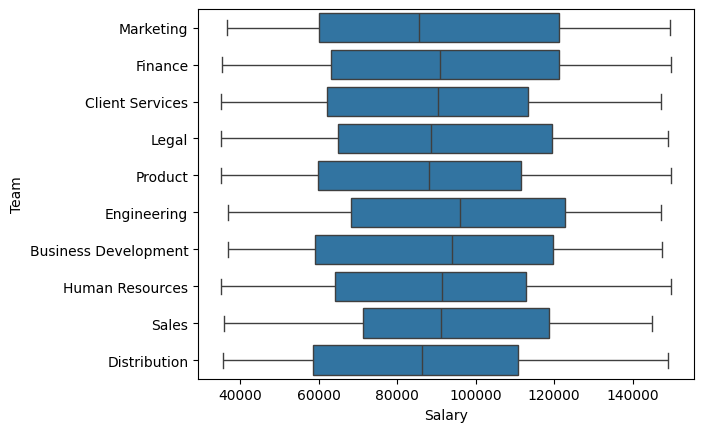

In [21]:
sns.boxplot(df,x="Salary",y="Team")
plt.show()

Scatter Plot For Data Visualization

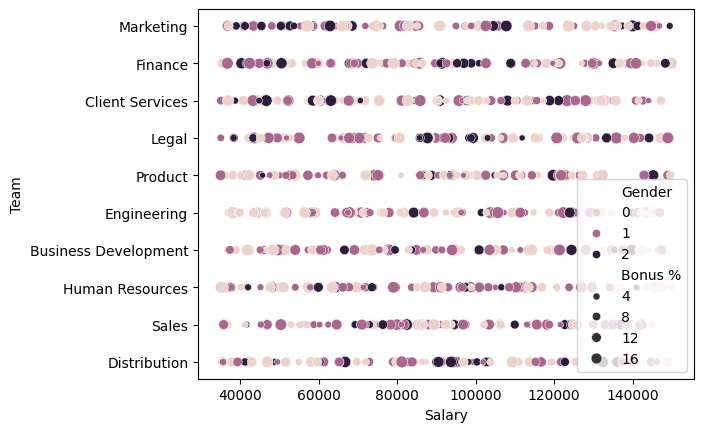

In [22]:
sns.scatterplot(df,x="Salary",y="Team",hue="Gender",size="Bonus %")
plt.show()

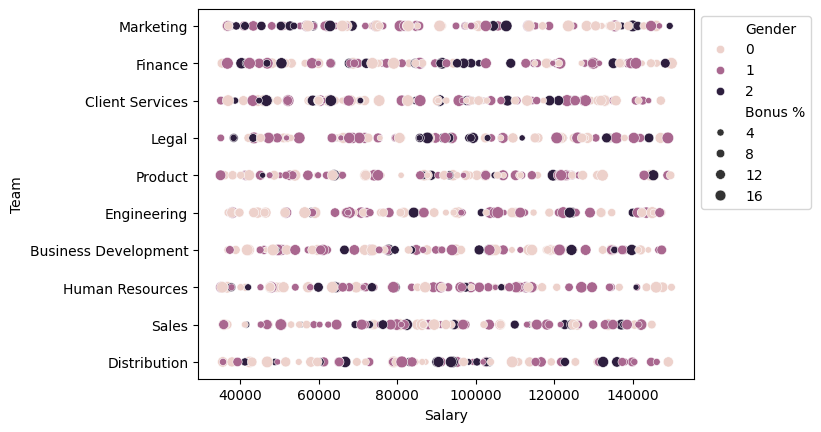

In [23]:
# Placing Legend outside the Figure
sns.scatterplot(df,x="Salary",y="Team",hue="Gender",size="Bonus %")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

Multivariate Analysis

Multivariate analysis involves examining the relationships among three or more variables. 

Some common methods include:

* Pair Plots: To visualize pairwise relationships across several variables at once.
* Heatmaps: Particularly useful for showing the correlation matrix between numerical variables.
* Faceted Grids: Allow you to explore data across many dimensions and are particularly useful for understanding the interaction effects among variables.

For Now, we will use pairplot() method of the seaborn module. We can also use it for the multiple pairwise bivariate distributions in a dataset.

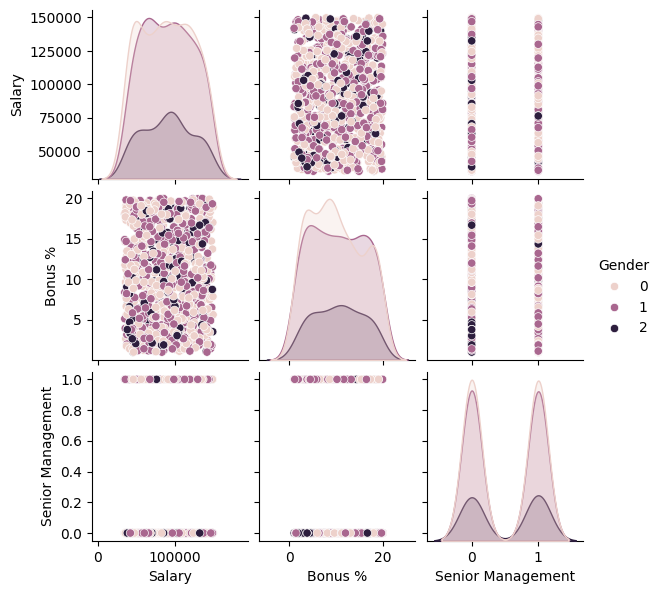

In [24]:
sns.pairplot(df,hue="Gender",height=2)
plt.show()

# Step 7: Handling Outliers

An Outlier is a data item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect outliers, and the removal process of these outliers from the dataframe is the same as removing a data item from the panda’s dataframe.

To handle outliers effectively, we need to identify them in key numerical variables that could significantly impact our analysis. For this dataset, we'll focus on 'Salary' and 'Bonus %' as these are critical financial metrics.

We'll use the Interquartile Range (IQR) method to identify outliers in these variables. The IQR method is robust as it defines outliers based on the statistical spread of the data.

In [25]:
# Calculate IQR for Salary and Bonus %

Q1_salary = df["Salary"].quantile(0.25)
Q3_salary = df["Salary"].quantile(0.75)

IQR_salary = Q3_salary - Q1_salary

Q1_bonus = df["Bonus %"].quantile(0.25)
Q3_bonus = df["Bonus %"].quantile(0.75)

IQR_bonus = Q3_bonus - Q1_bonus

In [26]:
# Define Outliers

outliers_salary = df[(df["Salary"] < (Q1_salary - 1.5 * IQR_salary))  |  
(df["Salary"] > (Q3_salary + 1.5 * IQR_salary))]


outliers_bonus = df[(df["Bonus %"] < (Q1_bonus - 1.5 * IQR_bonus))    |
(df["Bonus %"] > (Q3_bonus + 1.5 * IQR_bonus))]


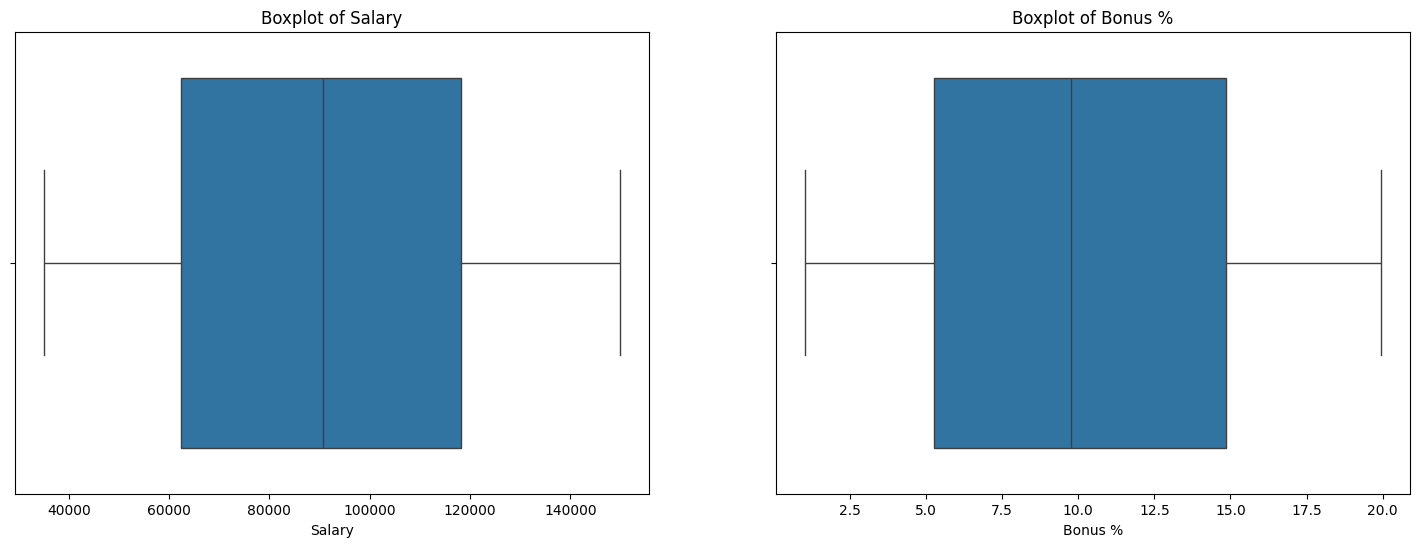

(0, 0)

In [27]:
# Plotting Boxplots

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.boxplot(df,x="Salary")
plt.title("Boxplot of Salary")

plt.subplot(1,2,2)
sns.boxplot(df,x="Bonus %")
plt.title("Boxplot of Bonus %")

plt.show()

# Display no of outliers detected

outliers_salary.shape[0], outliers_bonus.shape[0]

For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.